# Code to generate figure 2 part 2 for freeze events for the paper

In [1]:
# setup all the imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import yaml
import urllib.request
import matplotlib.font_manager
flist = matplotlib.font_manager.get_font_names()
from tempfile import NamedTemporaryFile
import urllib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import matplotlib.patches as patches
from extremeweatherbench import evaluate, utils, cases, defaults, inputs, metrics
sns.set_theme(style='whitegrid')
from shapely.geometry import Polygon
import shapely
from pathlib import Path
import multiprocessing

# make the basepath - change this to your local path
basepath = Path.home() / 'ExtremeWeatherBench' / ''
basepath = str(basepath) + '/'

In [2]:
# setup the templates to load in the data

# Forecast Examples
cira_freeze_forecast_FOURv2 = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/FOUR_v200_GFS.parq",
    variables=[
        "surface_air_temperature",
    ],
    variable_mapping={
        "t2": "surface_air_temperature",
    },
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
)

cira_freeze_forecast_GC = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/GRAP_v100_IFS.parq",
    variables=[
        "surface_air_temperature",
    ],
    variable_mapping={
        "t2": "surface_air_temperature",
    },
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
)

cira_freeze_forecast_PANG = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/PANG_v100_IFS.parq",
    variables=[
        "surface_air_temperature",
    ],
    variable_mapping={
        "t2": "surface_air_temperature",
    },
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
)


hres_forecast = inputs.ZarrForecast(
    source="gs://weatherbench2/datasets/hres/2016-2022-0012-1440x721.zarr",
    variables=[
        "surface_air_temperature",
    ],
    variable_mapping=inputs.HRES_metadata_variable_mapping,
    storage_options={"remote_options": {"anon": True}},
)


FOURv2_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=cira_freeze_forecast_FOURv2, 
    ),
]

FOURv2_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.era5_heatwave_target,
        forecast=cira_freeze_forecast_FOURv2, 
    ),
]

GC_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=cira_freeze_forecast_GC, 
    ),
]

GC_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.era5_heatwave_target,
        forecast=cira_freeze_forecast_GC, 
    ),
]

PANG_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=cira_freeze_forecast_PANG, 
    ),
]

PANG_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.era5_heatwave_target,
        forecast=cira_freeze_forecast_PANG, 
    ),
]

HRES_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=hres_forecast,
    ),
]

HRES_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="freeze",
        metric_list=[
            metrics.MinimumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
        ],
        target=defaults.era5_heatwave_target,
        forecast=hres_forecast,
    ),
]


In [3]:
# load in all of the events in the yaml file
case_dict = utils.load_events_yaml()
freeze_test = {"cases": case_dict["cases"]}

ewb_fourv2_ghcn = evaluate.ExtremeWeatherBench(freeze_test, FOURv2_GHCN_EVALUATION_OBJECTS)
ewb_fourv2_era5 = evaluate.ExtremeWeatherBench(freeze_test, FOURv2_ERA5_EVALUATION_OBJECTS)

ewb_gc_ghcn = evaluate.ExtremeWeatherBench(freeze_test, GC_GHCN_EVALUATION_OBJECTS)
ewb_gc_era5 = evaluate.ExtremeWeatherBench(freeze_test, GC_ERA5_EVALUATION_OBJECTS)

ewb_pang_ghcn = evaluate.ExtremeWeatherBench(freeze_test, PANG_GHCN_EVALUATION_OBJECTS)
ewb_pang_era5 = evaluate.ExtremeWeatherBench(freeze_test, PANG_ERA5_EVALUATION_OBJECTS)

ewb_hres_ghcn = evaluate.ExtremeWeatherBench(freeze_test, HRES_GHCN_EVALUATION_OBJECTS)
ewb_hres_era5 = evaluate.ExtremeWeatherBench(freeze_test, HRES_ERA5_EVALUATION_OBJECTS)

This function is deprecated and will be removed in a future release. Please use cases.load_ewb_events_yaml_into_case_collection instead.
This function is deprecated and will be removed in a future release. Please use cases.read_incoming_yaml instead.


In [5]:
# load in the results for all heat waves in parallel
# this will take awhile to run if you do them all in one code box so I commented most of them out here and copied them below
n_threads_per_process = 4
n_processes = max(1, multiprocessing.cpu_count() // n_threads_per_process)

fourv2_ghcn_results = ewb_fourv2_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
fourv2_era5_results = ewb_fourv2_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

# gc_ghcn_results = ewb_gc_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
# gc_era5_results = ewb_gc_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

pang_ghcn_results = ewb_pang_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
pang_era5_results = ewb_pang_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

hres_ghcn_results = ewb_hres_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
hres_era5_results = ewb_hres_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Forecast dataset for case 30 has no data for case time range 2021-02-10 12:00:00 to 2021-02-22 00:00:00.
Forecast dataset for case 91 has no data for case time range 2021-03-04 18:00:00 to 2021-03-10 18:00:00.


  0%|          | 0/14 [00:00<?, ?it/s]

Forecast dataset for case 91 has no data for case time range 2021-03-04 18:00:00 to 2021-03-10 18:00:00.
Forecast dataset for case 30 has no data for case time range 2021-02-10 12:00:00 to 2021-02-22 00:00:00.


  0%|          | 0/14 [00:00<?, ?it/s]

Forecast dataset for case 89 has no data for case time range 2024-01-11 12:00:00 to 2024-01-20 00:00:00.
Forecast dataset for case 32 has no data for case time range 2023-12-02 06:00:00 to 2023-12-08 06:00:00.
Forecast dataset for case 33 has no data for case time range 2023-12-15 06:00:00 to 2023-12-26 18:00:00.
Forecast dataset for case 96 has no data for case time range 2024-04-02 00:00:00 to 2024-04-08 00:00:00.
Forecast dataset for case 95 has no data for case time range 2024-01-20 00:00:00 to 2024-02-04 18:00:00.
Forecast dataset for case 92 has no data for case time range 2024-01-01 06:00:00 to 2024-01-09 12:00:00.
Forecast dataset for case 94 has no data for case time range 2024-04-16 12:00:00 to 2024-04-27 12:00:00.


  0%|          | 0/14 [00:00<?, ?it/s]

Forecast dataset for case 32 has no data for case time range 2023-12-02 06:00:00 to 2023-12-08 06:00:00.
Forecast dataset for case 92 has no data for case time range 2024-01-01 06:00:00 to 2024-01-09 12:00:00.
Forecast dataset for case 89 has no data for case time range 2024-01-11 12:00:00 to 2024-01-20 00:00:00.
Forecast dataset for case 33 has no data for case time range 2023-12-15 06:00:00 to 2023-12-26 18:00:00.
Forecast dataset for case 96 has no data for case time range 2024-04-02 00:00:00 to 2024-04-08 00:00:00.
Forecast dataset for case 94 has no data for case time range 2024-04-16 12:00:00 to 2024-04-27 12:00:00.
Forecast dataset for case 95 has no data for case time range 2024-01-20 00:00:00 to 2024-02-04 18:00:00.


In [6]:
# save the results so I don't have to keep re-running
fourv2_ghcn_results.to_pickle(basepath + 'docs/notebooks/figure2_part2_fourv2_ghcn_freeze_results.pkl')
fourv2_era5_results.to_pickle(basepath + 'docs/notebooks/figure2_part2_fourv2_era5_freeze_results.pkl')

pang_ghcn_results.to_pickle(basepath + 'docs/notebooks/figure2_part2_pang_ghcn_freeze_results.pkl')
pang_era5_results.to_pickle(basepath + 'docs/notebooks/figure2_part2_pang_era5_freeze_results.pkl')

hres_ghcn_results.to_pickle(basepath + 'docs/notebooks/figure2_part2_hres_ghcn_freeze_results.pkl')
hres_era5_results.to_pickle(basepath + 'docs/notebooks/figure2_part2_hres_era5_freeze_results.pkl')

In [4]:
# load the results back in
fourv2_ghcn_results = pd.read_pickle(basepath + 'docs/notebooks/figure2_part2_fourv2_ghcn_freeze_results.pkl')
fourv2_era5_results = pd.read_pickle(basepath + 'docs/notebooks/figure2_part2_fourv2_era5_freeze_results.pkl')

pang_ghcn_results = pd.read_pickle(basepath + 'docs/notebooks/figure2_part2_pang_ghcn_freeze_results.pkl')
pang_era5_results = pd.read_pickle(basepath + 'docs/notebooks/figure2_part2_pang_era5_freeze_results.pkl')

hres_ghcn_results = pd.read_pickle(basepath + 'docs/notebooks/figure2_part2_hres_ghcn_freeze_results.pkl')
hres_era5_results = pd.read_pickle(basepath + 'docs/notebooks/figure2_part2_hres_era5_freeze_results.pkl')

In [11]:
fourv2_era5_results

,value,lead_time,init_time,target_variable,metric,case_id_number,event_type
0,0.355286,0 days 00:00:00,NaN,surface_air_temperature,minimum_mae,30,freeze
1,1.310638,0 days 06:00:00,NaN,surface_air_temperature,minimum_mae,30,freeze
2,0.05777,0 days 12:00:00,NaN,surface_air_temperature,minimum_mae,30,freeze
3,0.81424,0 days 18:00:00,NaN,surface_air_temperature,minimum_mae,30,freeze
4,0.619629,1 days 00:00:00,NaN,surface_air_temperature,minimum_mae,30,freeze
...,...,...,...,...,...,...,...
2393,NaN,NaN,2024-04-05 00:00:00,surface_air_temperature,duration_me,96,freeze
2394,NaN,NaN,2024-04-05 12:00:00,surface_air_temperature,duration_me,96,freeze
2395,NaN,NaN,2024-04-06 00:00:00,surface_air_temperature,duration_me,96,freeze
2396,NaN,NaN,2024-04-06 12:00:00,surface_air_temperature,duration_me,96,freeze


In [5]:
# group the results by metric and lead time and take the mean across cases
fourv2_ghcn_group = fourv2_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
fourv2_ghcn_group = fourv2_ghcn_group.reset_index()

fourv2_era5_group = fourv2_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
fourv2_era5_group = fourv2_era5_group.reset_index()

# gc_ghcn_group = gc_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
# gc_ghcn_group = gc_ghcn_group.reset_index()

# gc_era5_group = gc_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
# gc_era5_group = gc_era5_group.reset_index()

pang_ghcn_group = pang_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
pang_ghcn_group = pang_ghcn_group.reset_index()

pang_era5_group = pang_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
pang_era5_group = pang_era5_group.reset_index()

hres_ghcn_group = hres_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
hres_ghcn_group = hres_ghcn_group.reset_index()

hres_era5_group = hres_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
hres_era5_group = hres_era5_group.reset_index()



In [8]:
def plot_results_by_metric(metric='rmse', filename=None, title='RMSE for All Heat Waves', forecast_hour=None):
    # make the pivot table so we can plot by lead time
    fourv2_ghcn_pivot = fourv2_ghcn_group[fourv2_ghcn_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')
    fourv2_era_pivot = fourv2_era5_group[fourv2_era5_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')

    pang_ghcn_pivot = pang_ghcn_group[pang_ghcn_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')
    pang_era5_pivot = pang_era5_group[pang_era5_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')

    hres_ghcn_pivot = hres_ghcn_group[hres_ghcn_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')
    hres_era5_pivot = hres_era5_group[hres_era5_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')

    if (forecast_hour == "zeroz"):
        # extract the 0z runs
        time_diff = hres_era5_pivot.columns.seconds % 86400 == 0
        zeroz = [idx for idx, n in enumerate(time_diff) if n]
        
        # subset down to only the 0z runs
        fourv2_ghcn_pivot = fourv2_ghcn_pivot.iloc[:, zeroz]
        fourv2_era_pivot = fourv2_era_pivot.iloc[:, zeroz]

        pang_ghcn_pivot = pang_ghcn_pivot.iloc[:, zeroz]
        pang_era5_pivot = pang_era5_pivot.iloc[:, zeroz]    

        hres_ghcn_pivot = hres_ghcn_pivot.iloc[:, zeroz]
        hres_era5_pivot = hres_era5_pivot.iloc[:, zeroz]
    elif (forecast_hour == "twelvez"):
        # extract the 12z runs
        time_diff = hres_era5_pivot.columns.seconds % 86400 == 43200
        twelvez = [idx for idx, n in enumerate(time_diff) if n]
        
        # subset down to only the 12z runs
        fourv2_ghcn_pivot = fourv2_ghcn_pivot.iloc[:, twelvez]
        fourv2_era_pivot = fourv2_era_pivot.iloc[:, twelvez]

        pang_ghcn_pivot = pang_ghcn_pivot.iloc[:, twelvez]
        pang_era5_pivot = pang_era5_pivot.iloc[:, twelvez]    

        hres_ghcn_pivot = hres_ghcn_pivot.iloc[:, twelvez]
        hres_era5_pivot = hres_era5_pivot.iloc[:, twelvez]
        

    # make the plots
    sns.set_theme(style='whitegrid')
    sns_palette = sns.color_palette("tab10")
    fig, ax = plt.subplots(figsize=(16,4))
    fourv2_ghcn_values = fourv2_ghcn_pivot.loc[metric].values
    fourv2_era5_values = fourv2_era_pivot.loc[metric].values
    pang_ghcn_values = pang_ghcn_pivot.loc[metric].values
    pang_era5_values = pang_era5_pivot.loc[metric].values
    hres_ghcn_values = hres_ghcn_pivot.loc[metric].values
    hres_era5_values = hres_era5_pivot.loc[metric].values

    plt.plot(np.flip(fourv2_ghcn_values), color=sns_palette[0], label='FourCastNet V2 GHCN', linewidth=2)
    plt.plot(np.flip(fourv2_era5_values), color=sns_palette[0], linestyle='--', label='FourCastNet V2 ERA5', linewidth=2)

    plt.plot(np.flip(pang_ghcn_values), color=sns_palette[1], label='Pangu Weather GHCN', linewidth=2)
    plt.plot(np.flip(pang_era5_values), color=sns_palette[1], linestyle='--', label='Pangu Weather ERA5', linewidth=2)  

    plt.plot(np.flip(hres_ghcn_values), color=sns_palette[2], label='HRES GHCN', linewidth=2)
    plt.plot(np.flip(hres_era5_values), color=sns_palette[2], linestyle='--', label='HRES ERA5', linewidth=2)

    # make the xticklabels more readable and show every other one
    # print(np.arange(0, len(merged_pivot.columns), 2))
    # print(merged_pivot.columns[::2])
    ax.set_xticks(rotation=90, labels=np.flip(fourv2_ghcn_pivot.columns), ticks=np.arange(0, len(fourv2_ghcn_pivot.columns), 1))
    #ax.set_xticks(ticks=np.arange(0, len(merged_pivot.columns), 2))

    ax.set_ylabel('Celsius')
    ax.set_xlabel('Initialization Time')
    plt.title(title)
    #ax.grid(True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=0.5)
    plt.legend(loc='best', fontsize=12)

    if (filename is not None):
        plt.savefig(filename, bbox_inches='tight', dpi=300)


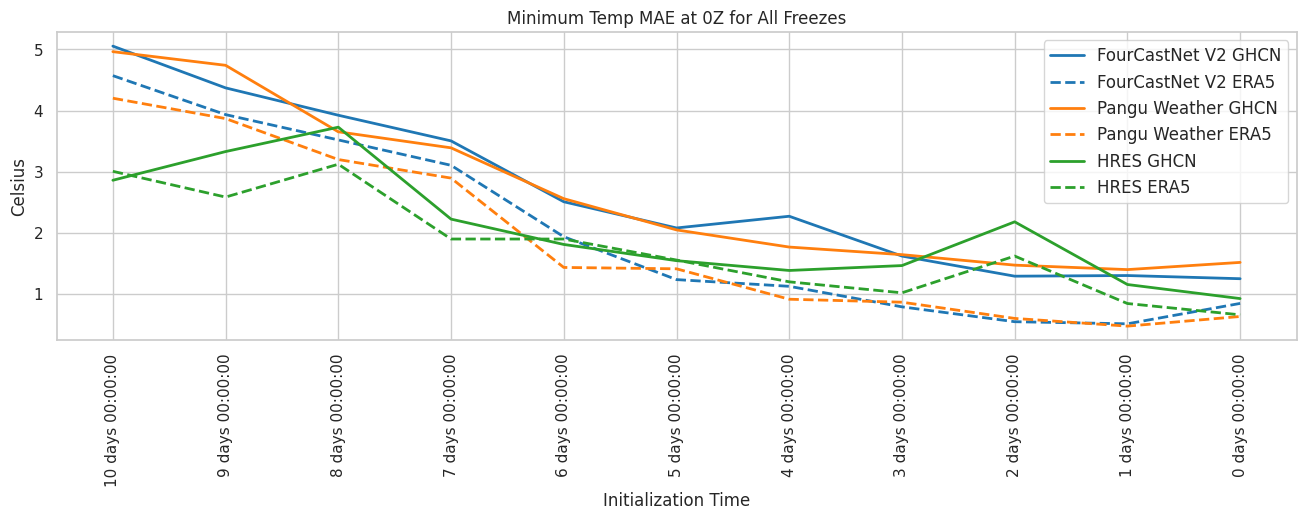

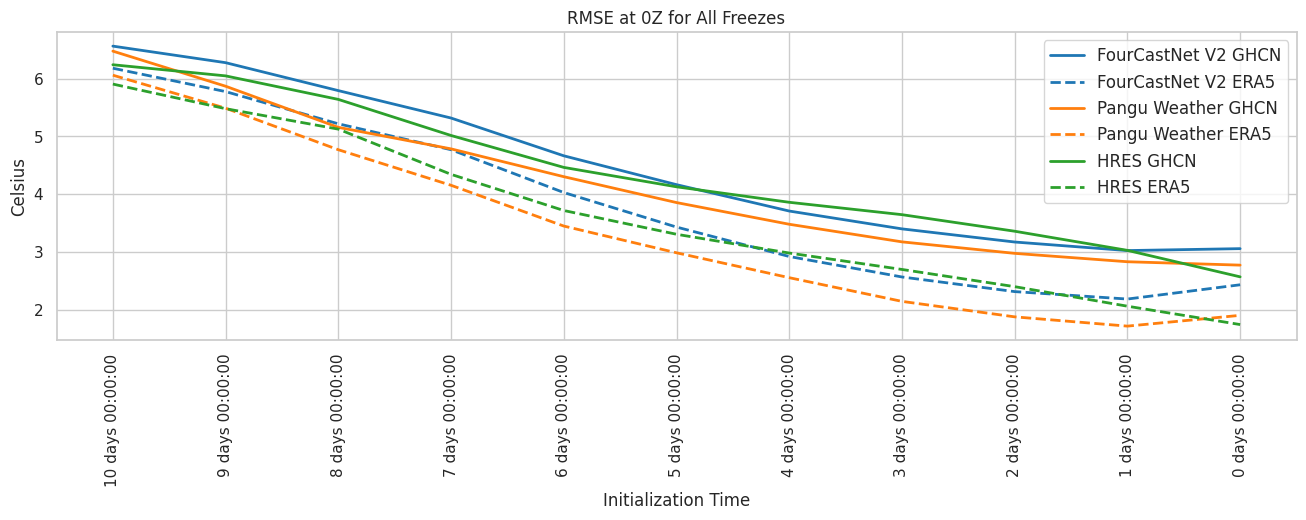

In [9]:
plot_results_by_metric(metric='minimum_mae', filename=basepath + 'docs/notebooks/figure2_part2_maximum_mae_freeze_0z.png', 
                       title='Minimum Temp MAE at 0Z for All Freezes', forecast_hour="zeroz")
plot_results_by_metric(metric='rmse', filename=basepath + 'docs/notebooks/figure2_part2_rmse_freeze.png', 
                       title='RMSE at 0Z for All Freezes', forecast_hour="zeroz")
